import data and choose features

In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

df = pd.read_csv("all_data_cleaned.csv")


df = df.drop(["garden_area"], axis=1)
df = df.drop(["terrace_area"], axis=1)
df = df.drop(["land_area"], axis=1)


df = df.dropna(subset=['price'])
df = df.dropna(subset=["habitable_surface"])

z_scores_price = stats.zscore(df['price'])
z_scores_hab_surf = stats.zscore(df['habitable_surface'])


abs_z_scores_price = np.abs(z_scores_price) 
abs_z_scores_hab_surf = np.abs(z_scores_hab_surf)

filtered_entries_price = (abs_z_scores_price < 2)
filtered_entries_hab_surf = (abs_z_scores_hab_surf < 2)


temp_df = df[filtered_entries_price]
df = temp_df[filtered_entries_hab_surf]



df_no_Nan = df.dropna(axis=0,how='any')
#print(df)

ndarray_immoElisa = df_no_Nan.values
# ndarray_immoElisa.dropna(axis=0,how='any')
print(ndarray_immoElisa[1])

x_ndarray_immoElisa =ndarray_immoElisa[:,10]
y_ndarray_immoElisa =ndarray_immoElisa[:,5]
print(x_ndarray_immoElisa )
print(y_ndarray_immoElisa)
print(len(df))
print(len(df_no_Nan))



[1
 'https://www.immoweb.be/en/classified/house/for-sale/namur/5000/10149128?searchId=633d8f38c384b'
 5000 'HOUSE' 'HOUSE' 159000.0 1900.0 'GOOD' 'Regular' 3.0 106.0
 'INSTALLED' 0 0 0 0 2.0 0 'Namur' 'Namur' 'Wallonia']
[155.0 106.0 290.0 ... 53.0 42.0 123.0]
[235000.0 159000.0 289000.0 ... 229000.0 100000.0 269000.0]
15846
6503


/tmp/ipykernel_3504/3863290162.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = temp_df[filtered_entries_hab_surf]


In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_ndarray_immoElisa, y_ndarray_immoElisa, train_size=0.8)

print(x_train)
print(y_train)

[350.0 423.0 56.0 ... 120.0 190.0 430.0]
[745000.0 650000.0 215000.0 ... 289000.0 275000.0 1250000.0]


make train,test

In [37]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math


reg = linear_model.LinearRegression()
reg.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
print(reg.score(x_train.reshape(-1,1), y_train.reshape(-1,1)))

y_predict = reg.predict(x_test.reshape(-1, 1))
price_error_sqr = mean_squared_error(y_test,y_predict)
price_error = math.sqrt(price_error_sqr)
print(price_error)

print(r2_score(y_test,y_predict))

0.38275138941411657
197644.02473562598
0.39959037993824364


plot

[350.0 423.0 56.0 ... 120.0 190.0 430.0]
[165.0 120.0 228.0 272.0 83.0 120.0 145.0 80.0 296.0 103.0 259.0 171.0
 80.0 50.0 181.0 90.0 315.0 125.0 78.0 120.0 175.0 190.0 150.0 165.0 98.0
 74.0 80.0 233.0 131.0 138.0 160.0 83.0 93.0 197.0 106.0 131.0 100.0 229.0
 305.0 168.0 115.0 60.0 128.0 140.0 137.0 325.0 111.0 165.0 110.0 220.0
 190.0 125.0 150.0 122.0 105.0 86.0 165.0 213.0 141.0 81.0 90.0 53.0 200.0
 164.0 135.0 72.0 120.0 83.0 300.0 75.0 35.0 170.0 346.0 100.0 300.0 84.0
 190.0 138.0 110.0 225.0 131.0 244.0 90.0 185.0 103.0 180.0 157.0 400.0
 159.0 28.0 82.0 117.0 103.0 88.0 150.0 215.0 71.0 170.0 98.0 105.0 360.0
 82.0 230.0 85.0 307.0 412.0 87.0 70.0 69.0 90.0 350.0 97.0 55.0 82.0 50.0
 229.0 99.0 140.0 65.0 88.0 142.0 175.0 90.0 134.0 353.0 250.0 145.0 137.0
 374.0 122.0 85.0 200.0 442.0 116.0 111.0 152.0 300.0 40.0 150.0 216.0
 158.0 80.0 50.0 160.0 307.0 95.0 102.0 210.0 87.0 290.0 265.0 300.0 133.0
 385.0 280.0 100.0 134.0 40.0 240.0 190.0 295.0 363.0 150.0 148.0 45.0
 80.0

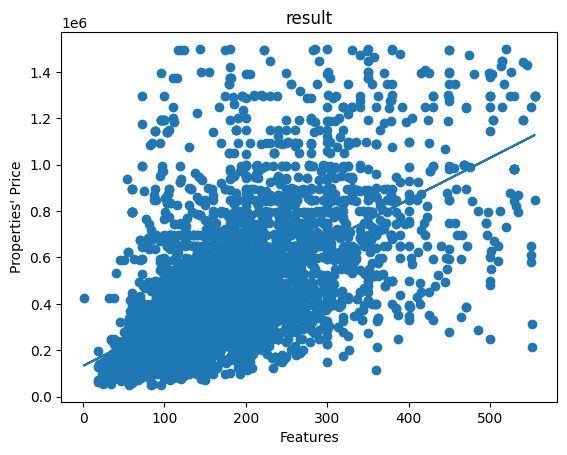

In [34]:
import matplotlib.pyplot as plt

plt.plot(x_train, reg.predict(x_train.reshape(-1,1)))
print(x_train)
print(x_test)
plt.scatter(x_train, y_train)
plt.title("result")
plt.ylabel("Properties' Price")
plt.xlabel("Features")
plt.show()